In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

In [2]:
# time step 만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()
    
    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
        
        seq_x, seq_y = sequence[i : end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)
    
    return np.array(x), np.array(y)

In [3]:
# sin 함수 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

In [6]:
# 하이퍼 파라미터
n_timesteps = 15
n_features = 1

# 시퀀스 나누기
# train_x.shape -> (samples, timesteps)
# train_y.shape -> (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

shape x:(185, 15) / y:(185,)


In [14]:
# RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)

print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


In [15]:
# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [16]:
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="loss", patience=5, mode="auto")
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 1s 17ms/step - loss: 0.4311
Epoch 2/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.2983
Epoch 3/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.2176
Epoch 4/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.1738
Epoch 5/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.1427
Epoch 6/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.1141
Epoch 7/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0889
Epoch 8/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0670
Epoch 9/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0493
Epoch 10/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0362
Epoch 11/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0264
Epoch 12/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0196
Epoch 13/1000
6/6 [==================

6/6 [==============================] - 0s 14ms/step - loss: 1.3104e-04
Epoch 101/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.3169e-04
Epoch 102/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.2151e-04
Epoch 103/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.1711e-04
Epoch 104/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.1059e-04
Epoch 105/1000
6/6 [==============================] - 0s 15ms/step - loss: 1.1022e-04
Epoch 106/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.0744e-04
Epoch 107/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.0725e-04
Epoch 108/1000
6/6 [==============================] - 0s 15ms/step - loss: 1.0553e-04
Epoch 109/1000
6/6 [==============================] - 0s 15ms/step - loss: 1.0873e-04
Epoch 110/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.1105e-04
Epoch 111/1000
6/6 [==============================] - 0s 13ms/step - 

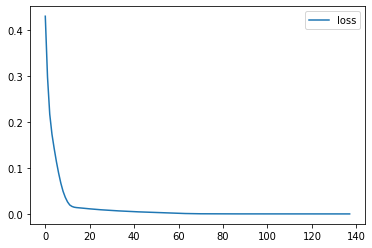

In [17]:
# loss 그래프 생성
plt.plot(history.history["loss"], label="loss")
plt.legend(loc="upper right")
plt.show()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 테스트 데이터셋 생성
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # 정답 데이터

In [20]:
# RNN 모델 예측 및 로그 저장
test_y = calc_y[ : n_timesteps]
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i : i + n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features))
    train_y = model.predict(net_input, verbose=0)
    print(test_y.shape, train_y.shape, i, i + n_timesteps)
    test_y = np.append(test_y, train_y)

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

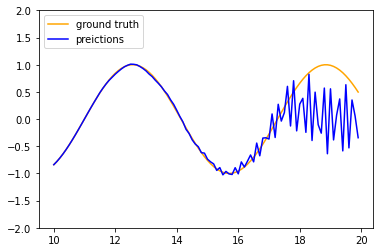

In [25]:
# 예측 결과 그래프 그리기
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="preictions", color="blue")
plt.legend(loc="upper left")
plt.ylim(-2, 2)
plt.show()

In [26]:
# LSTM 모델을 사용해서 sin 곡선 예측
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM

# time step만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()
    
    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
        
        seq_x, seq_y = sequence[i : end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)
    
    return np.array(x), np.array(y)
    

In [27]:
# sin 함수 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

# 하이퍼 파라미터
n_timesteps = 15
n_features = 1

# 시퀀스 나누기
# train_x.shape -> (samples, timesteps)
# train_y.shape -> (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

shape x:(185, 15) / y:(185,)


In [28]:
# LSTM 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)

print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


In [29]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mae")

# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="loss", patience=5, mode="auto")
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 5s 5ms/step - loss: 0.7073
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.6581
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6126
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.5705
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.5346
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.5001
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4714
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4456
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4247
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4041
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3876
Epoch 12/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3724
Epoch 13/1000
6/6 [==============================

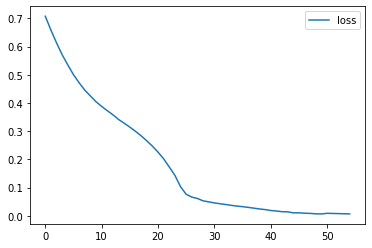

In [30]:
# loss 그래프 생성
plt.plot(history.history["loss"], label="loss")
plt.legend(loc="upper right")
plt.show()

In [31]:
# 테스트 데이터셋 생성
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # 정답 데이터

# LSTM 모델 예측 및 로그 저장
test_y = calc_y[ : n_timesteps]
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i : i + n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features))
    train_y = model.predict(net_input, verbose=0)
    print(test_y.shape, train_y.shape, i, i + n_timesteps)
    test_y = np.append(test_y, train_y)

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

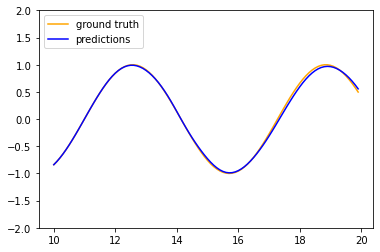

In [32]:
# 예측 결과 그래프 그리기
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predictions", color="blue")
plt.legend(loc="upper left")
plt.ylim(-2, 2)
plt.show()

In [33]:
# 양방향 LSTM
from random import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, TimeDistributed

# 시퀀스 생성
def get_sequence(n_timesteps):
    # 0 ~ 1 사이의 랜덤 시퀀스 생성
    X = np.array([random() for _ in range(n_timesteps)])
    
    # 클래스 분류 기준
    limit = n_timesteps / 4.0
    
    # 누적합 시퀀스에서 클래스 결정
    # 누적합 항목이 limit보다 작은 경우 0, 아닌 경우 1로 분류
    y = np.array([0 if x < limit else 1 for x in np.cumsum(X)])
    
    # LSTM 입력을 위해 3차원 텐서 형태로 변경
    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    
    return X, y

In [35]:
# 하이퍼 파라미터 정의
n_units = 20
n_timesteps = 4

# 양방향 LSTM 모델 정의
model = Sequential()
model.add(Bidirectional(LSTM(n_units, return_sequences=True, input_shape=(n_timesteps, 1))))
model.add(TimeDistributed(Dense(1, activation="sigmoid")))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# 모델 학습
# 에포크마다 학습 데이터를 생성해서 학습
for epoch in range(1000):
    X, y = get_sequence(n_timesteps)
    model.fit(X, y, epochs=1, batch_size=1, verbose=2)

1/1 - 2s - loss: 0.6984 - accuracy: 0.5000
1/1 - 0s - loss: 0.7033 - accuracy: 0.2500
1/1 - 0s - loss: 0.6907 - accuracy: 0.5000
1/1 - 0s - loss: 0.7045 - accuracy: 0.2500
1/1 - 0s - loss: 0.6926 - accuracy: 0.5000
1/1 - 0s - loss: 0.7008 - accuracy: 0.2500
1/1 - 0s - loss: 0.6918 - accuracy: 0.5000
1/1 - 0s - loss: 0.6869 - accuracy: 0.5000
1/1 - 0s - loss: 0.6874 - accuracy: 0.5000
1/1 - 0s - loss: 0.6939 - accuracy: 0.2500
1/1 - 0s - loss: 0.6963 - accuracy: 0.2500
1/1 - 0s - loss: 0.6880 - accuracy: 0.5000
1/1 - 0s - loss: 0.6823 - accuracy: 0.7500
1/1 - 0s - loss: 0.6865 - accuracy: 0.7500
1/1 - 0s - loss: 0.6815 - accuracy: 0.7500
1/1 - 0s - loss: 0.6924 - accuracy: 0.5000
1/1 - 0s - loss: 0.6880 - accuracy: 0.5000
1/1 - 0s - loss: 0.6854 - accuracy: 0.7500
1/1 - 0s - loss: 0.6875 - accuracy: 0.5000
1/1 - 0s - loss: 0.6798 - accuracy: 1.0000
1/1 - 0s - loss: 0.6850 - accuracy: 0.7500
1/1 - 0s - loss: 0.6747 - accuracy: 0.7500
1/1 - 0s - loss: 0.6728 - accuracy: 1.0000
1/1 - 0s - 

1/1 - 0s - loss: 0.1780 - accuracy: 1.0000
1/1 - 0s - loss: 0.2439 - accuracy: 1.0000
1/1 - 0s - loss: 0.2305 - accuracy: 1.0000
1/1 - 0s - loss: 0.3417 - accuracy: 0.7500
1/1 - 0s - loss: 0.2745 - accuracy: 0.7500
1/1 - 0s - loss: 0.2552 - accuracy: 1.0000
1/1 - 0s - loss: 0.3933 - accuracy: 0.7500
1/1 - 0s - loss: 0.4439 - accuracy: 0.7500
1/1 - 0s - loss: 0.3388 - accuracy: 0.7500
1/1 - 0s - loss: 0.3031 - accuracy: 0.7500
1/1 - 0s - loss: 0.2270 - accuracy: 1.0000
1/1 - 0s - loss: 0.2372 - accuracy: 1.0000
1/1 - 0s - loss: 0.2054 - accuracy: 1.0000
1/1 - 0s - loss: 0.2791 - accuracy: 0.7500
1/1 - 0s - loss: 0.1778 - accuracy: 1.0000
1/1 - 0s - loss: 0.1582 - accuracy: 1.0000
1/1 - 0s - loss: 0.2835 - accuracy: 0.7500
1/1 - 0s - loss: 0.2653 - accuracy: 1.0000
1/1 - 0s - loss: 0.2688 - accuracy: 0.7500
1/1 - 0s - loss: 0.3687 - accuracy: 0.7500
1/1 - 0s - loss: 0.3004 - accuracy: 0.7500
1/1 - 0s - loss: 0.3043 - accuracy: 0.7500
1/1 - 0s - loss: 0.2320 - accuracy: 1.0000
1/1 - 0s - 

1/1 - 0s - loss: 0.2039 - accuracy: 0.7500
1/1 - 0s - loss: 0.1647 - accuracy: 1.0000
1/1 - 0s - loss: 0.1770 - accuracy: 1.0000
1/1 - 0s - loss: 0.2326 - accuracy: 1.0000
1/1 - 0s - loss: 0.1364 - accuracy: 1.0000
1/1 - 0s - loss: 0.1498 - accuracy: 1.0000
1/1 - 0s - loss: 0.1907 - accuracy: 1.0000
1/1 - 0s - loss: 0.2105 - accuracy: 1.0000
1/1 - 0s - loss: 0.1704 - accuracy: 1.0000
1/1 - 0s - loss: 0.8062 - accuracy: 0.5000
1/1 - 0s - loss: 0.1662 - accuracy: 1.0000
1/1 - 0s - loss: 0.1009 - accuracy: 1.0000
1/1 - 0s - loss: 0.1282 - accuracy: 1.0000
1/1 - 0s - loss: 0.1579 - accuracy: 1.0000
1/1 - 0s - loss: 0.2063 - accuracy: 1.0000
1/1 - 0s - loss: 0.1543 - accuracy: 1.0000
1/1 - 0s - loss: 0.2241 - accuracy: 0.7500
1/1 - 0s - loss: 0.1544 - accuracy: 1.0000
1/1 - 0s - loss: 0.1122 - accuracy: 1.0000
1/1 - 0s - loss: 0.2307 - accuracy: 0.7500
1/1 - 0s - loss: 0.1444 - accuracy: 1.0000
1/1 - 0s - loss: 0.1717 - accuracy: 1.0000
1/1 - 0s - loss: 0.1750 - accuracy: 1.0000
1/1 - 0s - 

1/1 - 0s - loss: 0.1231 - accuracy: 1.0000
1/1 - 0s - loss: 0.1327 - accuracy: 1.0000
1/1 - 0s - loss: 0.3840 - accuracy: 0.7500
1/1 - 0s - loss: 0.1998 - accuracy: 1.0000
1/1 - 0s - loss: 0.1198 - accuracy: 1.0000
1/1 - 0s - loss: 0.1388 - accuracy: 1.0000
1/1 - 0s - loss: 0.4904 - accuracy: 0.7500
1/1 - 0s - loss: 0.2626 - accuracy: 0.7500
1/1 - 0s - loss: 0.9185 - accuracy: 0.5000
1/1 - 0s - loss: 0.2172 - accuracy: 1.0000
1/1 - 0s - loss: 0.1386 - accuracy: 1.0000
1/1 - 0s - loss: 0.7725 - accuracy: 0.5000
1/1 - 0s - loss: 0.1274 - accuracy: 1.0000
1/1 - 0s - loss: 0.4459 - accuracy: 0.7500
1/1 - 0s - loss: 0.1374 - accuracy: 1.0000
1/1 - 0s - loss: 0.1362 - accuracy: 1.0000
1/1 - 0s - loss: 0.2400 - accuracy: 0.7500
1/1 - 0s - loss: 0.3928 - accuracy: 0.7500
1/1 - 0s - loss: 0.1608 - accuracy: 1.0000
1/1 - 0s - loss: 0.1543 - accuracy: 1.0000
1/1 - 0s - loss: 0.8275 - accuracy: 0.5000
1/1 - 0s - loss: 0.2540 - accuracy: 0.7500
1/1 - 0s - loss: 0.4713 - accuracy: 0.7500
1/1 - 0s - 

1/1 - 0s - loss: 0.1520 - accuracy: 1.0000
1/1 - 0s - loss: 0.1055 - accuracy: 1.0000
1/1 - 0s - loss: 0.0971 - accuracy: 1.0000
1/1 - 0s - loss: 0.1613 - accuracy: 1.0000
1/1 - 0s - loss: 0.1599 - accuracy: 1.0000
1/1 - 0s - loss: 0.1747 - accuracy: 1.0000
1/1 - 0s - loss: 0.1678 - accuracy: 1.0000
1/1 - 0s - loss: 0.1245 - accuracy: 1.0000
1/1 - 0s - loss: 0.2019 - accuracy: 1.0000
1/1 - 0s - loss: 0.0929 - accuracy: 1.0000
1/1 - 0s - loss: 0.2423 - accuracy: 0.7500
1/1 - 0s - loss: 0.4568 - accuracy: 0.7500
1/1 - 0s - loss: 0.2809 - accuracy: 0.7500
1/1 - 0s - loss: 0.1160 - accuracy: 1.0000
1/1 - 0s - loss: 0.1669 - accuracy: 1.0000
1/1 - 0s - loss: 0.4435 - accuracy: 0.7500
1/1 - 0s - loss: 0.0927 - accuracy: 1.0000
1/1 - 0s - loss: 0.4840 - accuracy: 0.7500
1/1 - 0s - loss: 0.1123 - accuracy: 1.0000
1/1 - 0s - loss: 0.1187 - accuracy: 1.0000
1/1 - 0s - loss: 0.1565 - accuracy: 1.0000
1/1 - 0s - loss: 0.3151 - accuracy: 0.7500
1/1 - 0s - loss: 0.3735 - accuracy: 0.7500
1/1 - 0s - 

1/1 - 0s - loss: 0.1956 - accuracy: 0.7500
1/1 - 0s - loss: 0.1086 - accuracy: 1.0000
1/1 - 0s - loss: 0.1020 - accuracy: 1.0000
1/1 - 0s - loss: 0.1913 - accuracy: 0.7500
1/1 - 0s - loss: 0.1338 - accuracy: 1.0000
1/1 - 0s - loss: 0.1139 - accuracy: 1.0000
1/1 - 0s - loss: 0.1157 - accuracy: 1.0000
1/1 - 0s - loss: 0.2128 - accuracy: 0.7500
1/1 - 0s - loss: 0.1022 - accuracy: 1.0000
1/1 - 0s - loss: 0.1216 - accuracy: 1.0000
1/1 - 0s - loss: 0.2363 - accuracy: 0.7500
1/1 - 0s - loss: 0.1569 - accuracy: 1.0000
1/1 - 0s - loss: 0.0758 - accuracy: 1.0000
1/1 - 0s - loss: 0.0337 - accuracy: 1.0000
1/1 - 0s - loss: 0.0510 - accuracy: 1.0000
1/1 - 0s - loss: 0.1365 - accuracy: 1.0000
1/1 - 0s - loss: 0.4068 - accuracy: 0.7500
1/1 - 0s - loss: 0.0731 - accuracy: 1.0000
1/1 - 0s - loss: 0.2060 - accuracy: 0.7500
1/1 - 0s - loss: 0.2246 - accuracy: 1.0000
1/1 - 0s - loss: 0.1638 - accuracy: 1.0000
1/1 - 0s - loss: 0.0716 - accuracy: 1.0000
1/1 - 0s - loss: 0.0861 - accuracy: 1.0000
1/1 - 0s - 

In [37]:
# 모델 평가
X, y = get_sequence(n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
    print("실젯값: ", y[0, i], "예측값: ", yhat[0, i])

C:\Users\HYUNJUN\anaconda3\envs\chatbot\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


실젯값:  [0] 예측값:  [0]
실젯값:  [0] 예측값:  [0]
실젯값:  [1] 예측값:  [1]
실젯값:  [1] 예측값:  [1]


In [38]:
# 양방향 LSTM을 이용한 NER (named entity recognition)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

# 학습 파일 불러오기
def read_file(file_name):
    sents = []
    with open(file_name, "r", encoding="utf-8") as f:
        lines = f.readlines()
        for idx, l in enumerate(lines):
            if l[0] == ";" and lines[idx + 1][0] == "$":
                this_sent = []
            elif l[0] == "$" and lines[idx - 1][0] == ";":
                continue
            elif l[0] == "\n":
                sents.append(this_sent)
            else:
                this_sent.append(tuple(l.split()))
    
    return sents

In [39]:
# 학습용 말뭉치 데이터를 불러옴
corpus = read_file("./KoreanNERCorpus-master/modified/train.txt")

# 말뭉치 데이터에서 단어와 BIO 태그만 불러와 학습용 데이터셋 생성
sentences, tags = [], []
for t in corpus:
    tagged_sentence = []
    sentence, bio_tag = [], []
    for w in t:
        tagged_sentence.append((w[1], w[3]))
        sentence.append(w[1])
        bio_tag.append(w[3])
        
    sentences.append(sentence)
    tags.append(bio_tag)
    
print("샘플 크기: \n", len(sentences))
print("0번째 샘플 문장 시퀀스: \n", sentences[0])
print("0번째 샘플 bio 태그: \n", tags[0])
print("샘플 문장 시퀀스 최대 길이: ", max(len(l) for l in sentences))
print("샘플 문장 시퀀스 평균 길이: ", (sum(map(len, sentences)) / len(sentences)))

샘플 크기: 
 3555
0번째 샘플 문장 시퀀스: 
 ['한편', ',', 'AFC', '챔피언스', '리그', 'E', '조', '에', '속하', 'ㄴ', '포항', '역시', '대회', '8강', '진출', '이', '불투명', '하', '다', '.']
0번째 샘플 bio 태그: 
 ['O', 'O', 'O', 'O', 'O', 'B_OG', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
샘플 문장 시퀀스 최대 길이:  168
샘플 문장 시퀀스 평균 길이:  34.03909985935302


In [40]:
# 토크나이저 정의
sent_tokenizer = preprocessing.text.Tokenizer(oov_token="OOV") # 첫 번째 인덱스에는 OOV 사용
sent_tokenizer.fit_on_texts(sentences)
tag_tokenizer = preprocessing.text.Tokenizer(lower=False) # 태그 정보는 lower=False 소문자 변환 (x)
tag_tokenizer.fit_on_texts(tags)

In [41]:
# 단어 사전 및 태그 사전 크기
vocab_size = len(sent_tokenizer.word_index) + 1
tag_size = len(tag_tokenizer.word_index) + 1

print("BIO 태그 사전 크기: ", tag_size)
print("단어 사전 크기: ", vocab_size)

BIO 태그 사전 크기:  8
단어 사전 크기:  13834


In [42]:
# 학습용 단어 시퀀스 생성
x_train = sent_tokenizer.texts_to_sequences(sentences)
y_train = tag_tokenizer.texts_to_sequences(tags)

print(x_train[0])
print(y_train[0])

[183, 11, 4276, 884, 162, 931, 402, 10, 2608, 7, 1516, 608, 145, 1361, 414, 4, 6347, 2, 8, 3]
[1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [60]:
# index to word / index to NER 정의
index_to_word = sent_tokenizer.index_word # 시퀀스 인덱스를 단어로 변환하기 위해 사용
index_to_ner = tag_tokenizer.index_word # 시퀀스 인덱스를 NER로 변환하기 위해 사용
index_to_ner[0] = "PAD"

In [43]:
# 시퀀스 패딩 처리
max_len = 40
x_train = preprocessing.sequence.pad_sequences(x_train, padding="post", maxlen=max_len)
y_train = preprocessing.sequence.pad_sequences(y_train, padding="post", maxlen=max_len)

In [47]:
# 학습 데이터와 테스트 데이터를 8:2 비율로 분리
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

# 출력 데이터를 원-핫 인코딩
y_train = tf.keras.utils.to_categorical(y_train, num_classes=tag_size)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=tag_size)

print("학습 샘플 시퀀스 형상: ", x_train.shape)
print("학습 샘플 레이블 형상: ", y_train.shape)
print("테스트 샘플 시퀀스 형상: ", x_test.shape)
print("테스트 샘플 레이블 형상: ", y_test.shape)

학습 샘플 시퀀스 형상:  (2844, 40)
학습 샘플 레이블 형상:  (2844, 40, 8)
테스트 샘플 시퀀스 형상:  (711, 40)
테스트 샘플 레이블 형상:  (711, 40, 8)


In [49]:
# 모델 정의 (Bi-LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=30, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(200, return_sequences=True, dropout=0.5, recurrent_dropout=0.25)))
model.add(TimeDistributed(Dense(tag_size, activation="softmax")))
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.01), metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=10)

print("평가 결과: ", model.evaluate(x_test, y_test)[1])

Epoch 1/10
23/23 [==============================] - 17s 577ms/step - loss: 0.5183 - accuracy: 0.8386
Epoch 2/10
23/23 [==============================] - 13s 567ms/step - loss: 0.2461 - accuracy: 0.8929
Epoch 3/10
23/23 [==============================] - 13s 566ms/step - loss: 0.1588 - accuracy: 0.9227
Epoch 4/10
23/23 [==============================] - 13s 578ms/step - loss: 0.1147 - accuracy: 0.9471
Epoch 5/10
23/23 [==============================] - 13s 561ms/step - loss: 0.0817 - accuracy: 0.9644
Epoch 6/10
23/23 [==============================] - 13s 566ms/step - loss: 0.0576 - accuracy: 0.9753
Epoch 7/10
23/23 [==============================] - 13s 566ms/step - loss: 0.0438 - accuracy: 0.9805
Epoch 8/10
23/23 [==============================] - 13s 579ms/step - loss: 0.0347 - accuracy: 0.9849
Epoch 9/10
23/23 [==============================] - 13s 571ms/step - loss: 0.0301 - accuracy: 0.9867
Epoch 10/10
23/23 [==============================] - 2s 75ms/step - loss: 0.2056 - accuracy

In [61]:
# 시퀀스를 NER 태그로 변환
def sequences_to_tag(sequences):
    result = []
    for sequence in sequences:
        temp = []
        for pred in sequence:
            pred_index = np.argmax(pred)
            temp.append(index_to_ner[pred_index].replace("PAD", "O"))
        result.append(temp)
    
    return result

In [62]:
# 테스트 데이터셋의 NER 예측
y_predicted = model.predict(x_test) # (711, 40) -> model -> (711, 40, 8)
pred_tags = sequences_to_tag(y_predicted) # 예측된 NER
test_tags = sequences_to_tag(y_test)

In [65]:
# F1 스코어 계산을 위해 사용
from seqeval.metrics import f1_score, classification_report

print(classification_report(test_tags, pred_tags))
print("F1-score: {:.4f}".format(f1_score(test_tags, pred_tags)))

              precision    recall  f1-score   support

           _       0.67      0.58      0.62       657
         _DT       0.96      0.87      0.91       335
         _LC       0.71      0.58      0.64       312
         _OG       0.79      0.52      0.63       481
         _PS       0.84      0.43      0.57       374
         _TI       0.82      0.80      0.81        66

   micro avg       0.77      0.59      0.67      2225
   macro avg       0.80      0.63      0.70      2225
weighted avg       0.78      0.59      0.66      2225

F1-score: 0.6699


In [66]:
# 새로운 유형의 문장 NER 예측
word_to_index = sent_tokenizer.word_index
new_sentence = "삼성전자 출시 스마트폰 오늘 애플 도전장 내밀다.".split()
new_x = []
for w in new_sentence:
    try:
        new_x.append(word_to_index.get(w, 1))
    except KeyError:
        # 모르는 단어의 경우 OOV
        new_x.append(word_to_index["OOV"])
    
print("새로운 유형의 시퀀스: ", new_x)
new_padded_seqs = preprocessing.sequence.pad_sequences([new_x], padding="post", value=0, maxlen=max_len)

# NER 예측
p = model.predict(np.array([new_padded_seqs[0]]))
p = np.argmax(p, axis=-1) # 예측된 NER 인덱스값 추출

print("{:10} {:5}".format("단어", "예측된 NER"))
print("-" * 50)

for w, pred in zip(new_sentence, p[0]):
    print("{:10} {:5}".format(w, index_to_ner[pred]))

새로운 유형의 시퀀스:  [531, 307, 1476, 286, 1507, 6766, 1]
단어         예측된 NER
--------------------------------------------------
삼성전자       B_OG 
출시         O    
스마트폰       O    
오늘         B_DT 
애플         B_OG 
도전장        I    
내밀다.       I    
